In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv('/content/advertising.csv')

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [11]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

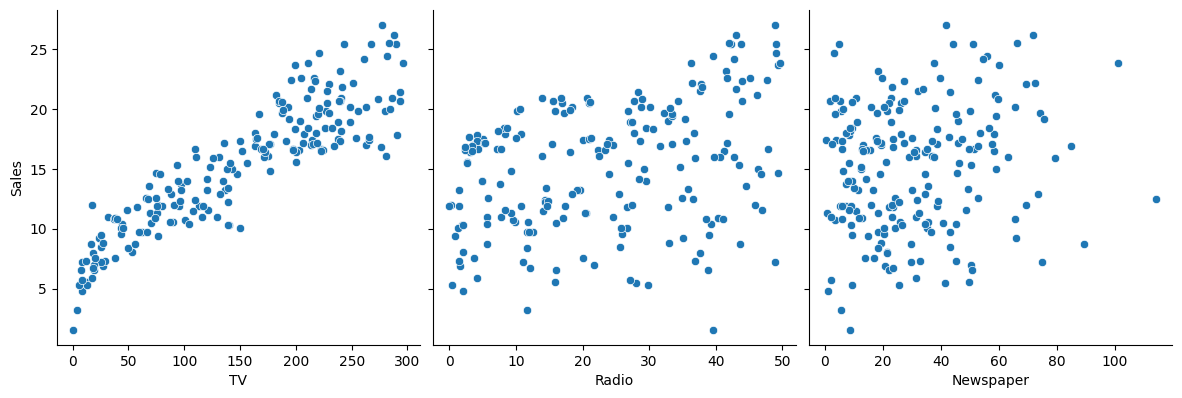

In [12]:
sns.pairplot(df, x_vars=['TV','Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [20]:
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [21]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [23]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {'Model': model_name, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}

In [24]:
results = []
results.append(evaluate_model(y_test, y_pred_lr, 'Linear Regression'))
results.append(evaluate_model(y_test, y_pred_poly, 'Polynomial Regression'))
results.append(evaluate_model(y_test, y_pred_svr, 'Support Vector Regression'))


In [26]:
print(results)
print(type(results))

[{'Model': 'Linear Regression', 'MAE': 1.2748262109549338, 'MSE': 2.9077569102710896, 'RMSE': np.float64(1.7052146229349223)}, {'Model': 'Polynomial Regression', 'MAE': 0.9033713382792442, 'MSE': 1.44254263690159, 'RMSE': np.float64(1.2010589647896517)}, {'Model': 'Support Vector Regression', 'MAE': 1.4836223881587627, 'MSE': 3.499087197255254, 'RMSE': np.float64(1.8705847206836834)}]
<class 'list'>


In [30]:
result_df = pd.DataFrame(results)
print(result_df)

                       Model       MAE       MSE      RMSE
0          Linear Regression  1.274826  2.907757  1.705215
1      Polynomial Regression  0.903371  1.442543  1.201059
2  Support Vector Regression  1.483622  3.499087  1.870585


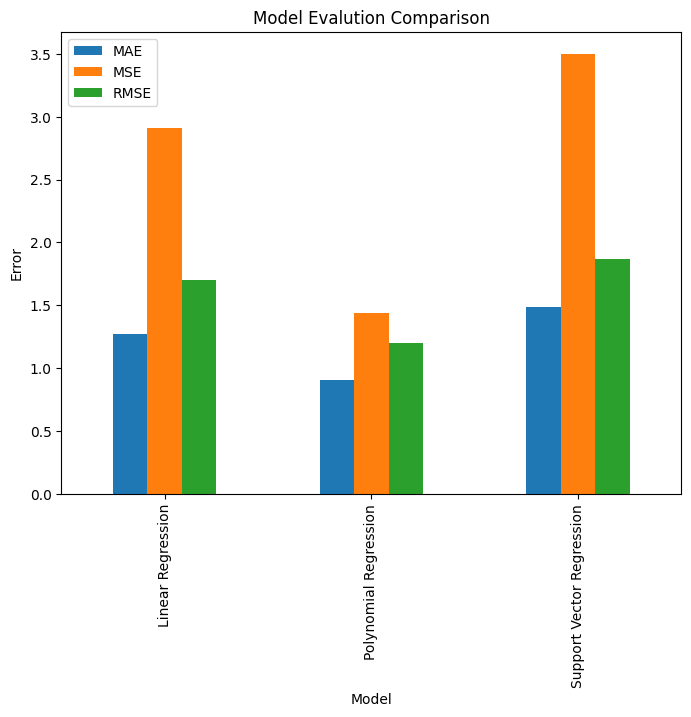

In [32]:
result_df.set_index("Model")[["MAE", "MSE", "RMSE"]].plot(kind="bar", figsize=(8,6))
plt.title("Model Evalution Comparison")
plt.ylabel("Error")
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

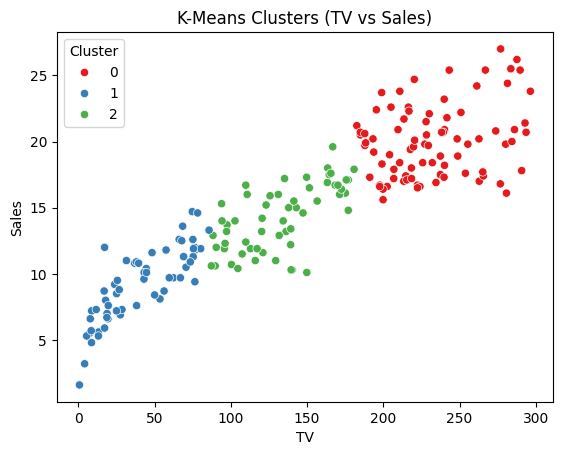

In [34]:
sns.scatterplot(x='TV', y='Sales', hue='Cluster', data=df, palette='Set1')
plt.title("K-Means Clusters (TV vs Sales)")
plt.show()